In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

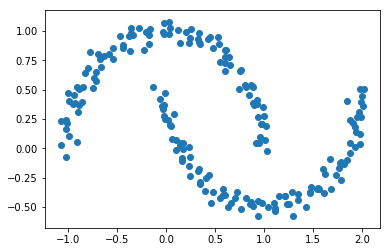

In [67]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:, 1])
plt.show()

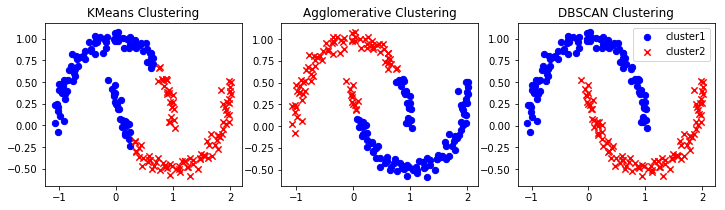

In [68]:
f, axs = plt.subplots(1, 3, figsize=(12, 3))
colors = ['blue', 'red']
markers = ['o', 'x']
titleName = ['KMeans', 'Agglomerative', 'DBSCAN']
km = KMeans(n_clusters=2, random_state=0)
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
for indice, model in enumerate([km, ac, db]):
    ax = axs[indice]
    title = titleName[indice]
    y_pred = model.fit_predict(X)   
    for idx, tag in enumerate(np.unique(y_pred)):
        label = 'cluster' + str(idx + 1)
        ax.scatter(X[y_pred == tag, 0], 
                   X[y_pred == tag, 1], 
                   c=colors[idx], 
                   marker=markers[idx], 
                   s=40, 
                   label=label)
    ax.set_title(title + ' Clustering')
plt.legend()
plt.show()

In [61]:
def aggClust_plot(X, linkages):
    from sklearn.cluster import AgglomerativeClustering
    import scipy.cluster.hierarchy as sch
    n = len(linkages)
    f, axs = plt.subplots(1, n, figsize=(n**2, n))
    colors = ['blue', 'red']
    markers = ['o', 'x']
    for indice, linkage in enumerate(linkages):
        ax = axs[indice]
        if linkage == 'single':
            row_clusters = sch.linkage(X, method='single', metric='euclidean')
            y_pred = sch.fcluster(row_clusters, t=2, criterion="maxclust")
        else:
            model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=linkage)
            y_pred = model.fit_predict(X)
        for idx, tag in enumerate(np.unique(y_pred)):
            label = 'cluster' + str(idx + 1)
            ax.scatter(X[y_pred == tag, 0], 
                       X[y_pred == tag, 1], 
                       c=colors[idx], 
                       marker=markers[idx], 
                       s=40, 
                       label=label)
        ax.set_title('Agg Clustering with %s linkage' % linkage)
    plt.legend()
    plt.show()   

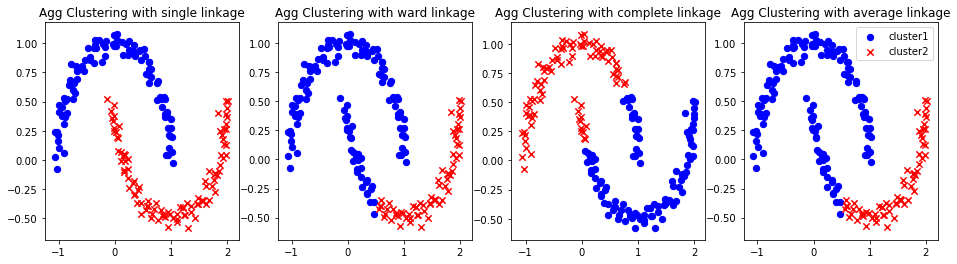

In [62]:
aggClust_plot(X, ['single', 'ward', 'complete', 'average'])

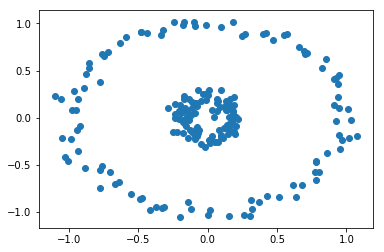

In [58]:
X2, y2 = make_circles(n_samples=200, noise=0.05, factor=0.2, random_state=0)
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

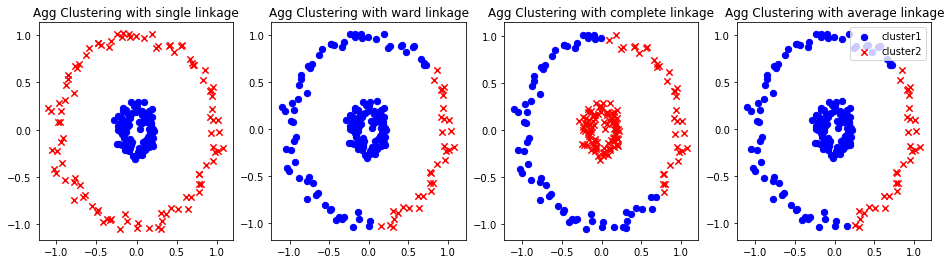

In [59]:
aggClust_plot(X2, ['single', 'ward', 'complete', 'average'])